### [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助  

### [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
plt.style.use('seaborn')

In [2]:
app_train = pd.read_csv("application_train.csv")
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train["DAYS_EMPLOYED_ANOM"] = app_train["DAYS_EMPLOYED"] == 365243
app_train["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train["DAYS_BIRTH"] = abs(app_train["DAYS_BIRTH"])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
# 確認"DAYS_BIRTH"和"TARGET"間的correlation
print(app_train["DAYS_BIRTH"].corr(app_train["TARGET"]))

# 觀察"DAYS_BIRTH"的統計描述
(app_train["DAYS_BIRTH"]/365).describe()

-0.07823930830982692


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [6]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[["TARGET", "DAYS_BIRTH"]] # subset
age_data["YEARS_BIRTH"] = age_data["DAYS_BIRTH"] / 365 # day-age to year-age

# 從統計資料看到年齡最小 ~20歲, 最大 ~70歲, 所以自20到70歲，切11個點(得到10組)
bin_cut =  np.linspace(20,70,11)
age_data["YEARS_BINNED"] = pd.cut(age_data["YEARS_BIRTH"], bins=bin_cut) 
age_data.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


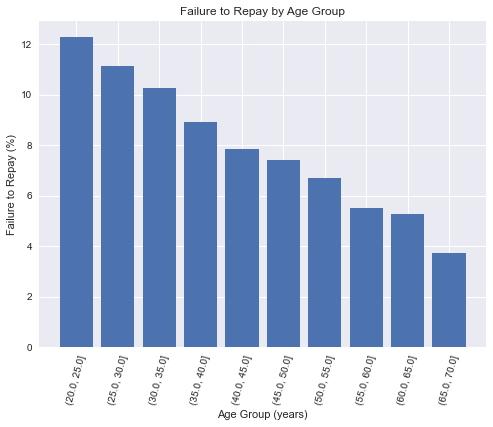

In [7]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups = age_data.groupby("YEARS_BINNED").mean()

#繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖
plt.figure(figsize=(8, 6))
plt.bar(range(len(age_groups.index)), age_groups["TARGET"]*100)
plt.xticks(range(len(age_groups.index)), age_groups.index, rotation=75); plt.xlabel("Age Group (years)"); 
plt.ylabel("Failure to Repay (%)"); plt.title("Failure to Repay by Age Group");